## Lecture 1 - Trapezoidal rule convergence

### Problem statement

In [1]:
%matplotlib inline
import numpy as np
from numpy import pi, e, heaviside
import matplotlib.pyplot as plt
a,b = 0,np.pi
def f_Cinf(x): return x * np.sin(x)
Iexact_Cinf= np.pi
def f_C0(x): return x * np.sin(x) * np.abs(x - e)
Iexact_C0 = -e*np.pi + np.pi**2 - 4*np.cos(e) - 2 * e * np.sin(e)
def f_disc(x): return x * np.sin(x) * (heaviside(x - e, 0) + .5)
Iexact_disc = 1.8232596387548898


### Numerical method

In [2]:
# Specify function to integrate here:
ff = f_Cinf
Iexact = Iexact_Cinf

Text(1.5707963267948966, 0.6064889026496632, '$\\int_a^b f(x)dx$')

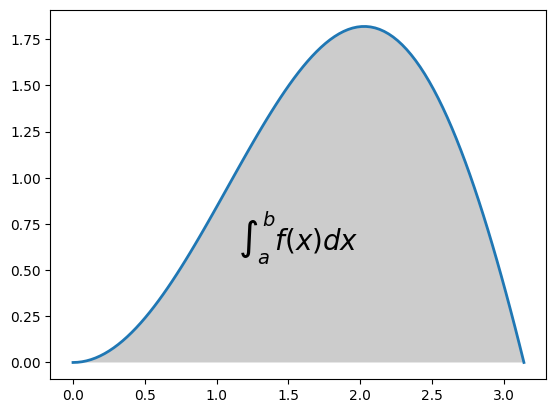

In [3]:
xx = np.linspace(a,b,101)
### Plot the line
plt.plot(xx, ff(xx), lw=2)
### Plot the area
plt.fill_between(xx, 0, ff(xx), facecolor='gray', alpha=0.4)
### Draw the math
plt.text(0.5*(a + b), np.max(ff(xx))/3,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)

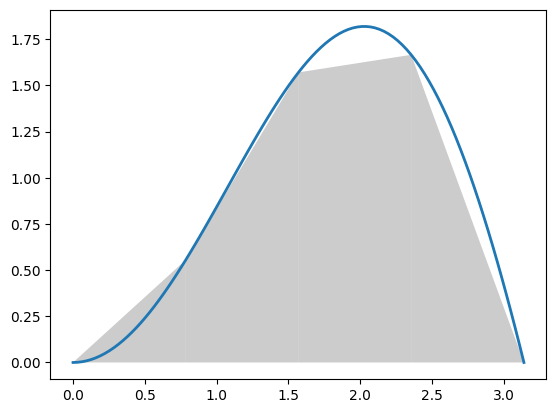

In [4]:
N = 4
xi = np.linspace(a,b,N+1)
fi = ff(xi)
plt.plot(xx, ff(xx), lw=2)
# Plot each trapezoid
for i in range(N):
    plt.fill_between(xi[i:i+2], 0, fi[i:i+2], facecolor='gray', alpha=0.4)

In [5]:
def I_trap(f,a,b,N):
    sum = 0.
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    for i in range(N):
        sum += 0.5*h*(f(x[i]) + f(x[i+1]))
    return sum

In [6]:
I_trap(ff,a,b,100)

3.1413342637004167

### Properties of the numerical approach (error)

In [7]:
print('%6s %12s %12s' % ('n', 'Q_N', '|Q_N - I|'))
for p in range(1,11):
    N = 2**p
    Iapprox = I_trap(ff,a,b,N)
    print('%6d %12.3e %12.3e' % (N, Iapprox, np.abs(Iapprox-Iexact)))

     n          Q_N    |Q_N - I|
     2    2.467e+00    6.742e-01
     4    2.978e+00    1.632e-01
     8    3.101e+00    4.048e-02
    16    3.131e+00    1.010e-02
    32    3.139e+00    2.524e-03
    64    3.141e+00    6.308e-04
   128    3.141e+00    1.577e-04
   256    3.142e+00    3.943e-05
   512    3.142e+00    9.857e-06
  1024    3.142e+00    2.464e-06


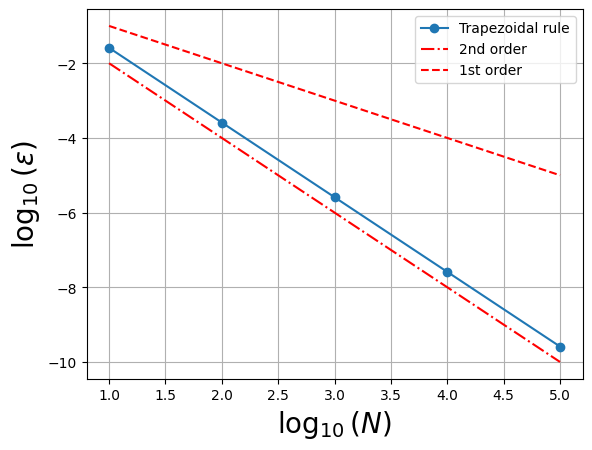

In [8]:
M = 5
NN = np.zeros(M,dtype='int')
Qapprox = np.zeros(M)
for p in range(1,M+1):
    NN[p-1] = 10**p
    Qapprox[p-1] = I_trap(ff,a,b,NN[p-1])
plt.plot(np.log10(NN), np.log10(np.abs(Qapprox-Iexact)), '-o', label="Trapezoidal rule")
plt.plot(np.log10([10, 10**M]), np.log10([10**-2, 10**-(2*M)]), '-.r', label="2nd order")
plt.plot(np.log10([10, 10**M]), np.log10([10**-1, 10**-(M)]), '--r', label="1st order")
plt.xlabel(r'$\log_{10}(N)$', fontsize=20)
plt.ylabel(r'$\log_{10}(\epsilon)$', fontsize=20)
plt.legend()
plt.grid()